# ch01.07 CNN기초 - Pooling Layer
---

* 날짜: 2022-07-05
* 이름: 고민수

## 학습내용
    - CNN의 개념을 이해한다.
    - 텐서플로우를 이용해 CNN을 구성한다.
    - CNN 모델을 이용해 손글씨 이미지를 분류한다.
    - CNN의 feature map에 대해 이해한다.

## 데이터셋

* MNIST

```
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
```

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Pooling layer
---

풀링(Pooling) 연산은 커널과 스트라이드 개념이 존재한다는 점에서 합성곱 연산과 유사하지만, 학습해야 할 가중치가 없으며 연산 후에 채널 수가 변하지 않습니다. 일반적으로 합성곱 층(합성곱 연산 + 활성화 함수) 다음에는 풀링 층을 추가하는 것이 일반적입니다. 


In [2]:
from tensorflow.keras.layers import MaxPool2D, AvgPool2D

### **| 맥스 풀링(Max Pooling)**
맥스풀링은 이미지 영역의 최대값 만을 출력값으로 가지는 연산 방법입니다. 



<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0107-01.PNG?raw=true width=400>
</p>



In [3]:
x = np.array([1,0,1,1,1,2,0,0,1,0,1,0,0,0,1,1], dtype='float16').reshape(1,4,4,1)
print(x[0,:,:,0], x.shape)
y = MaxPool2D(pool_size=2, strides=1)(x) # kernel_size = pool_size input shape = (n, w, h, ch)
print(y[0,:,:,0], y.shape)

[[1. 0. 1. 1.]
 [1. 2. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 1. 1.]] (1, 4, 4, 1)
tf.Tensor(
[[2. 2. 1.]
 [2. 2. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32) (1, 3, 3, 1)


### **| 평균 풀링(Average Pooling)**


평균풀링은 이미지 영역의 평균값 을 출력값으로 가지는 연산 방법입니다. 


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0107-02.PNG?raw=true width=400>
</p>





In [4]:
x = np.array([1,0,1,1,1,2,0,0,1,0,1,0,0,0,1,1], dtype='float16').reshape(1,4,4,1)
print(x[0,:,:,0], x.shape)
y = AvgPool2D(pool_size=2, strides=1)(x) # kernel_size = pool_size input shape = (n, w, h, ch)
print(y[0,:,:,0], y.shape)

[[1. 0. 1. 1.]
 [1. 2. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 1. 1.]] (1, 4, 4, 1)
tf.Tensor(
[[1.   0.75 0.5 ]
 [1.   0.75 0.25]
 [0.25 0.5  0.75]], shape=(3, 3), dtype=float32) (1, 3, 3, 1)


## LeNet-5
---

LeNet-5[(논문)](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) 구조는 아마도 가장 널리 알려진 CNN 구조일 것입니다. 이 구조는 1998년 얀 르쿤이 만들었으며 손글씨 숫자 인식(MNIST)에 널리 사용되었습니다. 


![](https://www.datasciencecentral.com/wp-content/uploads/2021/10/1lvvWF48t7cyRWqct13eU0w.jpeg)

### | LeNet-5을 이용한 손글씨 이미지 분류

####  **데이터 준비**

In [5]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 전처리-정규화
x_train, x_test = x_train/255.0 , x_test/255.0
# 전처리-shape 맞추기
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


#### **모델 구성**

In [6]:
from tensorflow.keras import layers, models, utils
def build_lenet5():
    x = layers.Input(shape=(28,28,1))
    y = layers.Conv2D(filters=6, kernel_size=5, padding='same', activation='tanh')(x)
    y = layers.AvgPool2D(pool_size=2, strides=2)(y) # pooling 레이어에서는 filters 없어서, 채널을 조정 불가
    y = layers.Conv2D(filters=16, kernel_size=5, padding='valid', activation='tanh')(y)
    y = layers.MaxPool2D(pool_size=2, strides=2)(y)

    y = layers.Flatten()(y)
    y = layers.Dense(120, activation='tanh')(y)
    y = layers.Dense(84, activation='tanh')(y)
    y = layers.Dense(10, activation='softmax')(y)
    model = tf.keras.models.Model(x, y)
    return model

model = build_lenet5()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_1 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0     

#### **학습 및 평가**

In [7]:
model = build_lenet5()
model.summary()
model.compile(optimizer='sgd', # 경사하강법 (배치개수에 한번씩 업데이트)
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train, epochs=10)
print('------------- 테스트 스코어 -----------------')
model.evaluate(x_test, y_test)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0   

[0.04546542838215828, 0.9864000082015991]

### **| Feature map**

#### **feature map 얻기**

In [13]:
layer_outputs = [layer.output for layer in model.layers]

model_output_by_layer = models.Model(inputs=model.input, outputs=layer_outputs)

x_pred_maps = model_output_by_layer(x_test)
for x_pred_map in x_pred_maps:
    print(x_pred_map.shape)
    
cnn_layers = [1,2,3,4]
dnn_layers = [6,7,8]

(10000, 28, 28, 1)
(10000, 28, 28, 6)
(10000, 14, 14, 6)
(10000, 10, 10, 16)
(10000, 5, 5, 16)
(10000, 400)
(10000, 120)
(10000, 84)
(10000, 10)


#### **시각화**

![](https://www.datasciencecentral.com/wp-content/uploads/2021/10/1lvvWF48t7cyRWqct13eU0w.jpeg)

[시각화 함수 스크립트](https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/scripts/featuremap_dict.py)

In [14]:
from Myfunc import show_featuremap

1 번째 Convolutional 레이어 (28, 28, 6)


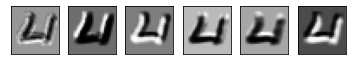

2 번째 Convolutional 레이어 (14, 14, 6)


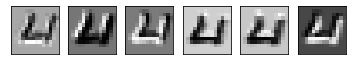

3 번째 Convolutional 레이어 (10, 10, 16)


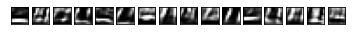

4 번째 Convolutional 레이어 (5, 5, 16)


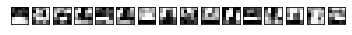

6 번째 Dense 레이어 (120,)


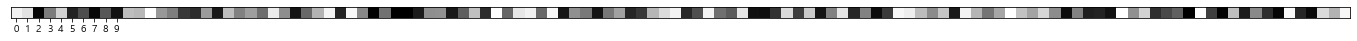

7 번째 Dense 레이어 (84,)


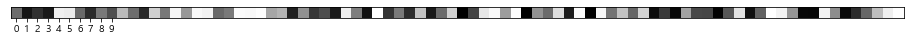

8 번째 Dense 레이어 (10,)


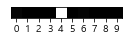

In [15]:
sample_idx = 33
show_featuremap(sample_idx, x_pred_maps, cnn_layers, dnn_layers)

## 과제 1. 의류 이미지 분류
---

<center> 데이터 셋 : fashion_mnist </center>  

|레이블|클래스|
|--|--|
|0|T-shirt/top|
|1|Trouser|
|2|Pullover|
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag|
|9|Ankle boot|

### 데이터 로드 및 전처리

In [23]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# 전처리-정규화
x_train, x_test = x_train/255.0 , x_test/255.0
# 전처리-shape 맞추기
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


In [24]:
# 클래스
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 데이터 보기

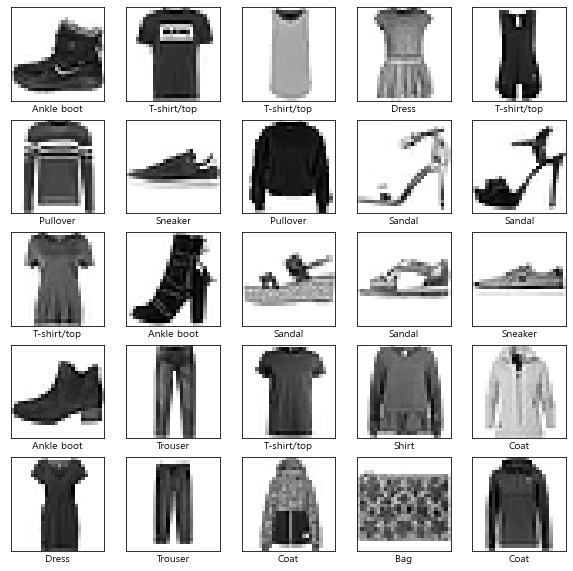

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### 모델생성

In [49]:
from tensorflow.keras import layers, models, utils
def build_lenet5():
    x = layers.Input(shape=(28,28,1), name="Input")
    y = layers.Conv2D(filters=6, kernel_size=5, padding='same', activation='tanh', name="C1")(x)
    y = layers.AvgPool2D(pool_size=2, strides=2, name="P1")(y) # pooling 레이어에서는 filters 없어서, 채널을 조정 불가
    y = layers.Conv2D(filters=16, kernel_size=5, padding='valid', activation='tanh', name="C2")(y)
    y = layers.MaxPool2D(pool_size=2, strides=2, name="P2")(y)

    y = layers.Flatten(name="Flatten")(y)
    y = layers.Dense(120, activation='tanh', name="D1")(y)
    y = layers.Dense(84, activation='tanh', name="D2")(y)
    y = layers.Dense(10, activation='softmax', name="D3")(y)
    model = tf.keras.models.Model(x, y, name="LeNet_fashion_mnist")
    return model

In [50]:
model = build_lenet5()
model.summary()

Model: "LeNet_fashion_mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 28, 28, 1)]       0         
                                                                 
 C1 (Conv2D)                 (None, 28, 28, 6)         156       
                                                                 
 P1 (AveragePooling2D)       (None, 14, 14, 6)         0         
                                                                 
 C2 (Conv2D)                 (None, 10, 10, 16)        2416      
                                                                 
 P2 (MaxPooling2D)           (None, 5, 5, 16)          0         
                                                                 
 Flatten (Flatten)           (None, 400)               0         
                                                                 
 D1 (Dense)                  (None, 120)       

### 모델 학습

In [45]:
import tqdm
import tensorflow_addons as tfa

tqdm_callback = tfa.callbacks.TQDMProgressBar(show_epoch_progress=False)

model.compile(
    optimizer='sgd',  # 경사하강법 (배치개수에 한번씩 업데이트)
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, verbose=0, callbacks=[tqdm_callback])
print('------------- 테스트 스코어 -----------------')
model.evaluate(x_test, y_test)

Training:   0%|                                                                                0/10 ETA: ?s,  …

------------- 테스트 스코어 -----------------
313/313 [==============================] - 1s 4ms/step - loss: 0.3314 - accuracy: 0.8776


[0.3314373195171356, 0.8776000142097473]

### 예측 결과

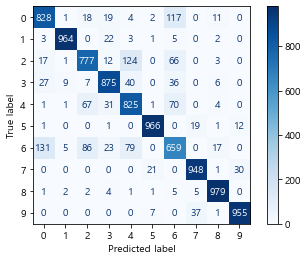

In [48]:
y_pred = np.argmax(model.predict(x_test), axis=1)

# 혼돈행렬 만들기
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion_matrix는 정수값이 들어가야함
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues");

In [70]:
# 예측률이 낮은 class
print("예측률이 낮은 class: ", end="")
for i in [0,2,3,4,6]:
    print(class_names[i], end=", ")

예측률이 낮은 class: T-shirt/top, Pullover, Dress, Coat, Shirt, 

In [71]:
# 예측률이 높은 class
print("예측률이 높은 class: ", end="")
for i in [1,5,7,8,9]:
    print(class_names[i], end=", ")

예측률이 높은 class: Trouser, Sandal, Sneaker, Bag, Ankle boot, 

## 과제 2. 동물 및 물체 이미지 분류
---

<center> 데이터 셋 : cifar-10 </center>  

|레이블|클래스|
|--|--|
|0|airplane|
|1|automobile|
|2|bird|
|3|cat|
|4|deer|
|5|dog|
|6|frog|
|7|horse|
|8|ship|
|9|truck|

### 데이터 로드 및 전처리

In [84]:
# 데이터 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 전처리-정규화
x_train, x_test = x_train/255.0 , x_test/255.0

# y 값 reshape
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000,) (10000,)


In [78]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### 데이터 보기

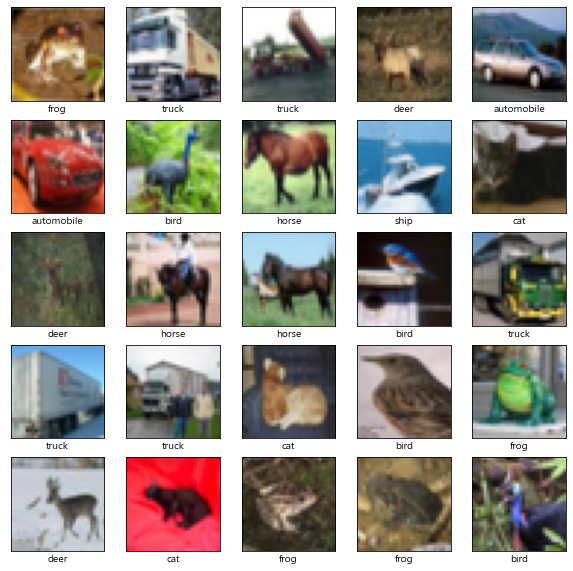

In [85]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### 모델 생성

In [87]:
from tensorflow.keras import layers, models, utils
def build_LeNet():
    x = layers.Input(shape=(32,32,3), name="Input")
    y = layers.Conv2D(filters=6, kernel_size=5, padding='same', activation='tanh', name="C1")(x)
    y = layers.AvgPool2D(pool_size=2, strides=2, name="P1")(y) # pooling 레이어에서는 filters 없어서, 채널을 조정 불가
    y = layers.Conv2D(filters=16, kernel_size=5, padding='valid', activation='tanh', name="C2")(y)
    y = layers.MaxPool2D(pool_size=2, strides=2, name="P2")(y)

    y = layers.Flatten(name="Flatten")(y)
    y = layers.Dense(120, activation='tanh', name="D1")(y)
    y = layers.Dense(84, activation='tanh', name="D2")(y)
    y = layers.Dense(10, activation='softmax', name="D3")(y)
    model = tf.keras.models.Model(x, y, name="LeNet_cifar10")
    return model

In [89]:
model = build_LeNet()
model.summary()

Model: "LeNet_cifar10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 32, 32, 3)]       0         
                                                                 
 C1 (Conv2D)                 (None, 32, 32, 6)         456       
                                                                 
 P1 (AveragePooling2D)       (None, 16, 16, 6)         0         
                                                                 
 C2 (Conv2D)                 (None, 12, 12, 16)        2416      
                                                                 
 P2 (MaxPooling2D)           (None, 6, 6, 16)          0         
                                                                 
 Flatten (Flatten)           (None, 576)               0         
                                                                 
 D1 (Dense)                  (None, 120)             

In [90]:
import tqdm
import tensorflow_addons as tfa

tqdm_callback = tfa.callbacks.TQDMProgressBar(show_epoch_progress=False)

model.compile(
    optimizer='sgd',  # 경사하강법 (배치개수에 한번씩 업데이트)
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, verbose=0, callbacks=[tqdm_callback])
print('------------- 테스트 스코어 -----------------')
model.evaluate(x_test, y_test)

Training:   0%|                                                                                0/10 ETA: ?s,  …

------------- 테스트 스코어 -----------------
313/313 [==============================] - 2s 4ms/step - loss: 1.1952 - accuracy: 0.5771


[1.1951544284820557, 0.5770999789237976]

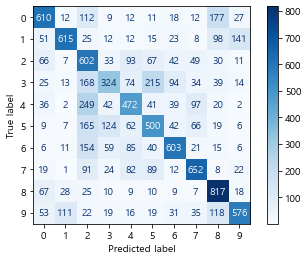

In [91]:
y_pred = np.argmax(model.predict(x_test), axis=1)

# 혼돈행렬 만들기
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion_matrix는 정수값이 들어가야함
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues");